<a href="https://colab.research.google.com/github/Stephen-Gordon/python_cnn_image_classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
# Import Image Generator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 2s 0us/step


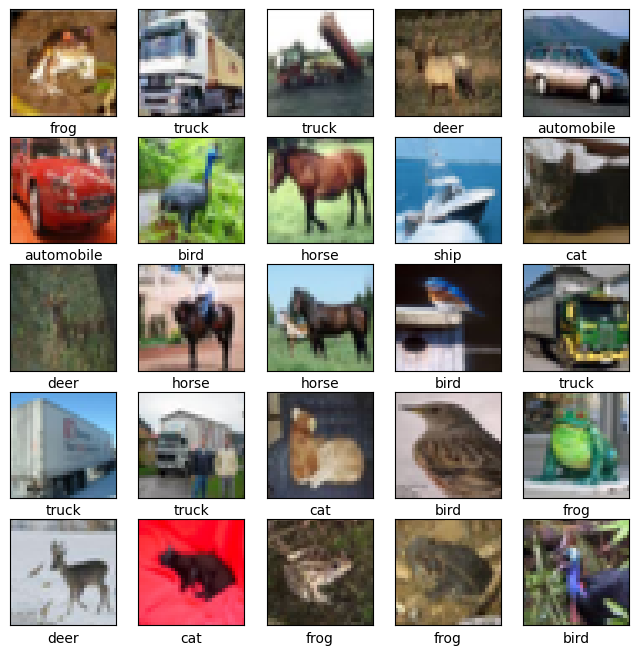

In [9]:


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:

datagen = ImageDataGenerator(rotation_range=40)

# Assuming original_images and original_labels are your original dataset
original_images = np.array(train_images)
original_labels = np.array(train_labels)

augmented_images = []  # To store augmented images

for img in original_images:
    x = img.reshape((1,) + img.shape)  # Convert the image to (1, height, width, channels)

    i = 0
    for batch in datagen.flow(x, batch_size=1):
        augmented_images.append(batch[0])
        i += 1
        if i > 1:
            break

# Convert the list of original and augmented images to NumPy arrays
augmented_images = np.array(augmented_images)

# Create a new array that contains both the original and augmented images
train_images = np.concatenate((original_images, augmented_images), axis=0)

# Create a new array that contains both the original and augmented labels (if applicable)
train_labels = np.concatenate((original_labels, original_labels), axis=0)

# Now, train_images and train_labels can be used for training your model


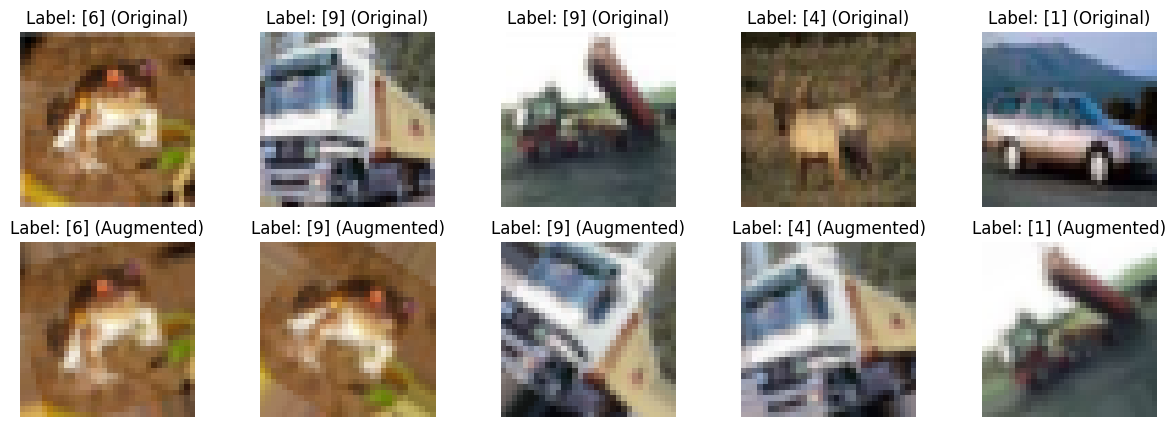

In [14]:
import matplotlib.pyplot as plt

# Assuming train_images and train_labels are your arrays
# Make sure to adjust the indices based on your data

num_images_to_preview = 5

# Plot original and augmented images with labels
plt.figure(figsize=(15, 5))
for i in range(num_images_to_preview):
    # Original images
    plt.subplot(2, num_images_to_preview, i + 1)
    plt.imshow(train_images[i])  # Assuming images are in [0, 255] range
    plt.axis('off')
    plt.title(f'Label: {train_labels[i]} (Original)')

    # Augmented images
    plt.subplot(2, num_images_to_preview, num_images_to_preview + i + 1)
    plt.imshow(train_images[i + len(original_images)])
    plt.axis('off')
    plt.title(f'Label: {train_labels[i + len(original_images)]} (Augmented)')

plt.show()


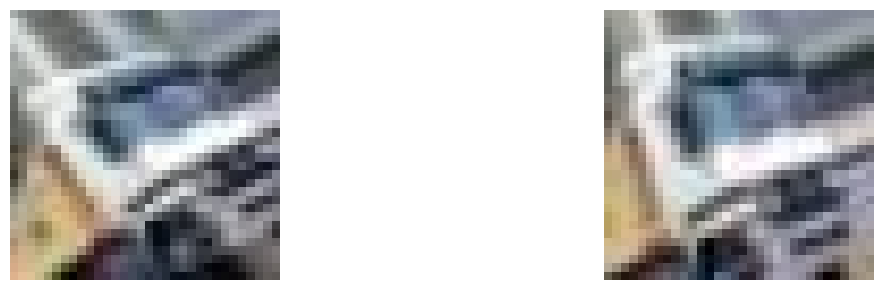

In [55]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Specify the path to the directory containing your images
preview_dir = "/content/preview3"

# List all files in the directory
image_files = sorted(os.listdir(preview_dir))

# Ensure there are files in the directory
if len(image_files) > 0:
    # Set up the subplots based on the number of images
    num_images = len(image_files)
    rows = (num_images // 5) + 1
    cols = min(num_images, 5)

    # Set up the plot
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

    # Loop through each image file and plot it
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(preview_dir, image_file)
        img = Image.open(image_path)

        # Determine the subplot location
        if rows > 1:
            ax = axes[i // 5, i % 5]
        else:
            ax = axes[i % 5]

        # Plot the image
        ax.imshow(img)
        ax.axis('off')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()
else:
    print("No images found in the specified directory.")


Create the convolutional base

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

# **Adding Dense Layers on the top**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# **Compile and train the model**

In [ ]:


# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.5408 - accuracy: 0.4346 - val_loss: 1.2922 - val_accuracy: 0.5322
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1684 - accuracy: 0.5825 - val_loss: 1.1198 - val_accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0141 - accuracy: 0.6427 - val_loss: 1.0218 - val_accuracy: 0.6368
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9218 - accuracy: 0.6764 - val_loss: 0.9417 - val_accuracy: 0.6665
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8490 - accuracy: 0.7021 - val_loss: 0.8966 - val_accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7919 - accuracy: 0.7231 - val_loss: 0.9099 - val_accuracy: 0.6825
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7452 - accuracy: 0.7364 - val_loss: 0.9474 -

# Evaluate the **model**

313/313 - 2s - loss: 0.9084 - accuracy: 0.6955 - 2s/epoch - 7ms/step


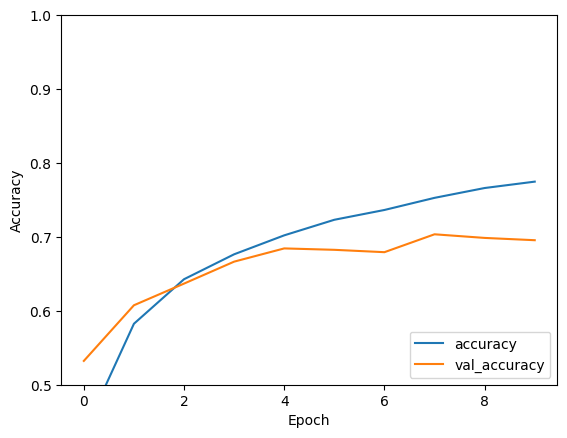

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6955000162124634
